In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import sys
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline 

# OSEMN
- Obtain
- Scrub
- Explore
- Model
- Interpret

## OSMEN - Obtain Data
-	Obtain Data from different sources
    - Files – csv, tsv, flat files, jsons, Excel format
    - Web APIs
    - Webpage crawlers
    - Databases
-	Merge data from many files discovering columns by which they are connected

In [123]:
#Load data
train_values = pd.read_csv('data/train_values.csv', index_col='building_id')
train_values.sort_index(inplace=True)
train_labels = pd.read_csv('data/train_labels.csv', index_col='building_id')
train_labels.sort_index(inplace=True)
test_values = pd.read_csv('data/test_values.csv', index_col='building_id')
test_values.sort_index(inplace=True)

train_values.shape, train_labels.shape

((260601, 38), (260601, 1))

In [124]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0
8,17,409,12182,2,0,13,7,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [125]:
train_labels.head()

,damage_grade
building_id,
4,2
8,3
12,3
16,2
17,2


## OSEMN - Scrub Data

-	Consolidate data from different source (i.e. merge them for later analysis)
-	Handle missing values (use mask or sentinel value)
-	Remove columns with constant data (or almost constant)
-	Remove duplicated columns or containing same information
-	Generate derived features (engineer features)
-	Transform dates to common format
-	Handle data inconsistencies and outliners

In [126]:
#Missing values
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 38 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        260601 n

In [127]:
# Encode
df_cleaned = pd.get_dummies(train_values)
df_cleaned.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,17,409,12182,2,0,13,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12,17,716,7056,2,5,12,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
16,4,651,105,2,80,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
17,3,1387,3909,5,40,5,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [128]:
df_test_enc = pd.get_dummies(test_values)
df_test_enc.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,10,151,708,2,25,8,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13,9,445,203,1,20,3,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
49,10,760,4087,2,25,2,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
92,26,1023,11319,2,20,5,4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,4,1202,5735,1,5,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## OSEMN – Explore
-	Get the business question and transform it to data science question
-	Explore each column and identify data ranges
-	Correlations between different features
-	Identify major and minor features which will impact the model
-	Identify features with almost no impact on problem modeling (noise)
-	Remove columns with constant data (or almost constant)
-	Remove duplicated columns or containing same information
-	Handle data inconsistencies and outliners

In [129]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 68 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
has_superstructure_adobe_mud              260601 non-null int64
has_superstructure_mud_mortar_stone       260601 non-null int64
has_superstructure_stone_flag             260601 non-null int64
has_superstructure_cement_mortar_stone    260601 non-null int64
has_superstructure_mud_mortar_brick       260601 non-null int64
has_superstructure_cement_mortar_brick    260601 non-null int64
has_superstructure_timber                 260601 non-nul

In [130]:
df_cleaned.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.00000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,0.136331,0.031911,0.831758,0.005556,0.040595,0.841117,0.054720,0.058012,0.701617,0.236285,0.062099,0.804368,0.001949,0.094370,0.09546,0.003853,0.152889,0.634234,0.046155,0.166722,0.050967,0.008952,0.775477,0.164604,0.000967,0.001247,0.959597,0.000084,0.000177,0.000146,0.000610,0.021842,0.001328,0.014002,0.021151,0.005652,0.962924,0.010272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.343140,0.175763,0.374082,0.074334,0.197350,0.365567,0.227433,0.233767,0.457549,0.424800,0.241335,0.396687,0.044108,0.292344,0.29385,0.061950,0.359881,0.481645,0.209821,0.372728,0.219930,0.094193,0.417269,0.370824,0.031082,0.035293,0.196902,0.009188,0.013285,0.012075,0.024693,0.146167,0.036413,0.117500,0.143888,0.074969,0.188948,0.100831
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [131]:
sums = df_cleaned.sum()
sums.sort_values().head(30)

plan_configuration_f                        22
has_secondary_use_use_police                23
has_secondary_use_gov_office                38
plan_configuration_n                        38
plan_configuration_m                        46
has_secondary_use_health_post               49
has_secondary_use_school                    94
plan_configuration_o                       159
has_secondary_use_institution              245
plan_configuration_a                       252
has_secondary_use_industry                 279
plan_configuration_c                       325
plan_configuration_s                       346
ground_floor_type_m                        508
ground_floor_type_z                       1004
has_secondary_use_other                   1334
foundation_type_h                         1448
legal_ownership_status_r                  1473
has_secondary_use_rental                  2111
position_o                                2333
legal_ownership_status_w                  2677
plan_configur

In [132]:
df_cleaned.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,17,409,12182,2,0,13,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12,17,716,7056,2,5,12,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
16,4,651,105,2,80,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
17,3,1387,3909,5,40,5,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Outliners - using pyOD

In [133]:
#Outliners try with pyOD
# from pyod.models.pca import PCA
# clf = PCA()
# DOPASOWANIE CORUPTION % - PODZIEL NA ZBIOR TRAIN/TEST - dopasuj (używaj metod wizualnych!)

In [134]:
# from pyod.models.pca import PCA
# clf = PCA()
from pyod.models.knn import KNN

clf = KNN(contamination=0.18)
clf.fit(df_cleaned)
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

# get the prediction on the test data
# y_test_pred = clf.predict(df_test_enc)  # outlier labels (0 or 1)
# y_test_scores = clf.decision_function(df_test_enc)  # outlier scores

In [135]:
df_outliners = df_cleaned.copy()
df_outliners['outliner'] = y_train_pred
df_outliners['outliner_score'] = y_train_scores
# df_outliners[df_outliners['outliner']==0].hist(figsize=(100,100))

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_cleaned)
pca_result.shape

(260601, 3)

In [137]:
pca.components_.shape

(3, 68)

In [138]:
for i in range(3):
    df_outliners['pca'+str(i)]=pca_result[:,i]

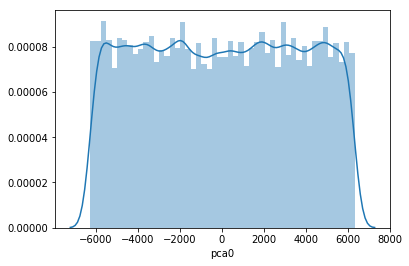

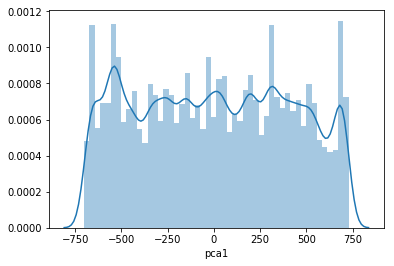

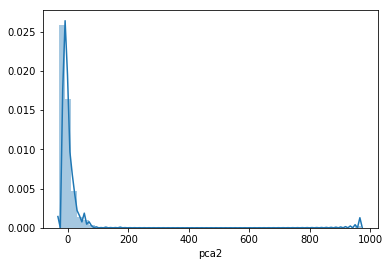

In [150]:
for i in range(3):
    sns.distplot(df_outliners['pca'+str(i)], bins=None)
    plt.show()

In [ ]:
df_x = df_outliners[['pca0', 'pca1', 'pca2', 'outliner']].copy()
bins = 10
df_x.pca0 = pd.cut(df_outliners.pca0, 20, include_lowest=True, duplicates='drop')
df_x.pca1 = pd.cut(df_outliners.pca1, 10, include_lowest=True, duplicates='drop')
df_x.pca2 = pd.cut(df_outliners.pca2, 10, include_lowest=True, duplicates='drop')
df_x.drop_duplicates(inplace=True)

df_x.head()

In [ ]:
df_x.reset_index(inplace=True, drop=True)
df_x.pca0 = df_x_pca.pca0.cat.codes
df_x.pca1 = df_x_pca.pca1.cat.codes
df_x.pca2 = df_x_pca.pca2.cat.codes

In [ ]:
for i in range(3):
    sns.countplot(x=df_x['pca'+str(i)])
    plt.show()

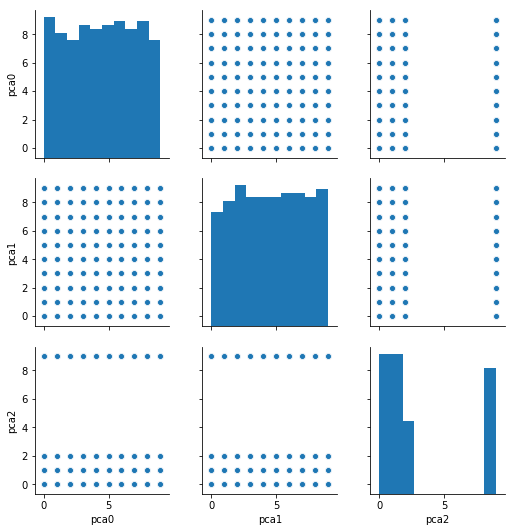

In [171]:
sns.pairplot(data=df_x_pca)

In [43]:
df_outliners_test = df_test_enc.copy()
df_outliners_test['outliner'] = y_test_pred
df_outliners_test['outliner_score'] = y_test_scores
df_outliners_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,outliner,outliner_score
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,10,151,708,2,25,8,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.656854
13,9,445,203,1,20,3,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.414214
49,10,760,4087,2,25,2,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.358899
92,26,1023,11319,2,20,5,4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.236068
100,4,1202,5735,1,5,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.123106


In [ ]:
#TODO ->>>> START HERE <<<<<-

## OSEMN – Model
-	Select features based on Explore phase – both major and minor features. 
- Remove useless features. Do the dimensionality reduction.
-	Split dataset – train/validation/test
-	Balance dataset
-	Choose metric – for us chosen by competition organizer.
-	Build model and tune, save it, review results on validation dataset.
-	Choose best model (many competitions’ winners use ensemble of many models to increase models accuracy)

## SMOTE

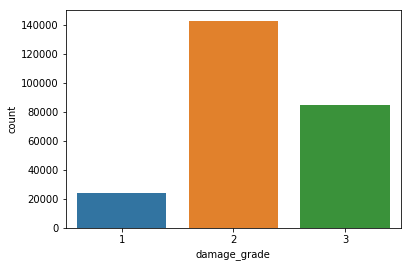

In [61]:
sns.countplot(data=train_labels, x='damage_grade')

In [62]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42, k_neighbors=5)
x_oversampled, y_oversampled = os.fit_resample(df_enc, train_labels['damage_grade'])

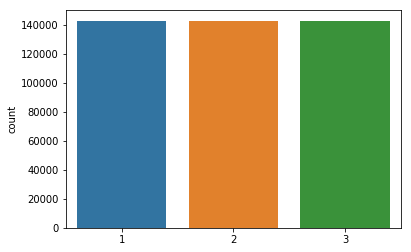

In [63]:
sns.countplot(x=y_oversampled)

# Model

In [64]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [65]:
pipe = make_pipeline(
    MinMaxScaler(), 
    PowerTransformer(standardize=False), 
    xgb.XGBClassifier(objective='multi:softmax', num_class=3, reg_lambda=0.8, )
)
pipe

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('powertransformer', PowerTransformer(copy=True, method='yeo-johnson', standardize=False)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, ga...      reg_lambda=0.8, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])

In [ ]:
param_grid={
    'xgbclassifier__base_score': [0.55],
     'xgbclassifier__colsample_bytree': [0.8],
     'xgbclassifier__max_depth': [12],
     'xgbclassifier__min_child_weight': [1],
     'xgbclassifier__n_estimators': [1000],
     'xgbclassifier__subsample': [0.8]
}
gs = GridSearchCV(pipe, param_grid, cv=3, n_jobs=3, verbose=4)
gs.fit(x_oversampled, y_oversampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

# Prediction

In [ ]:
test_enc = pd.get_dummies(test_values)
predictions = gs.predict(test_enc)

In [ ]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

In [ ]:
my_submission.to_csv('submission-v4-blog2.csv')

In [ ]:
!head submission-v4-blog2.csv